# Data Exploaration: Addis Ababa Light Rail Transit
**Project Goal**: Analyze passenger ridership and operational efficiency  
**Author**: Gosaye Emshaw  
**Date**: 04/05/2025

# 1. Project Setup
## 1.1 Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System utilities
import os
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')

print("Libraries and modules imported successfully!")

Libraries and modules imported successfully!


## 1.2 Load Dataset and Initial Check

In [2]:
# Load the data
data = pd.read_csv("../data/raw/transit_data.csv", parse_dates=['date'])

print("=== DATASET LOADED ===")
print(f"Shape: {data.shape}")
print(f"Date Range: {data['date'].min()} to {data['date'].max()}")
print(f"Total Days: {data['date'].nunique()}")

# Quick review
print("\n=== FIRST 5 ROWS ===")
display(data.head())

=== DATASET LOADED ===
Shape: (2824, 9)
Date Range: 2017-07-08 00:00:00 to 2025-03-31 00:00:00
Total Days: 2824

=== FIRST 5 ROWS ===


,date,passengers_ns,passengers_ew,passengers_total,train_ew_single,train_ew_couple,train_ns_single,train_ns_couple,train_total
0,2017-07-08,53759,64872,118631,1.0,7.0,1.0,7.0,16
1,2017-07-09,52556,60074,112630,1.0,7.0,1.0,7.0,16
2,2017-07-10,63700,71569,135269,1.0,7.0,1.0,7.0,16
3,2017-07-11,57504,67418,124922,1.0,7.0,1.0,7.0,16
4,2017-07-12,69832,66576,136408,1.0,7.0,1.0,7.0,16


In [3]:
# Check for missing dates
expected_days = (data['date'].max() - data['date'].min()).days + 1
actual_days = data['date'].nunique()

print(f"Expected days: {expected_days}, Actual days: {actual_days}")
if expected_days == actual_days:
    print("Complete daily data - no missing dates")
else:
    print("Some dates might be missing")

Expected days: 2824, Actual days: 2824
Complete daily data - no missing dates


# 2. Data Structure Understanding
## 2.1 Column Anlysis

In [4]:
# display column information
print("=== COLUMNS INFORMATION ===")
display(data.info())

# statistical summary
print("\n=== BASIC STATISTICAL SUMMARY ===")
display(data.describe())



=== COLUMNS INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2824 non-null   datetime64[ns]
 1   passengers_ns     2824 non-null   int64         
 2   passengers_ew     2824 non-null   int64         
 3   passengers_total  2824 non-null   int64         
 4   train_ew_single   2817 non-null   float64       
 5   train_ew_couple   2763 non-null   float64       
 6   train_ns_single   2817 non-null   float64       
 7   train_ns_couple   2763 non-null   float64       
 8   train_total       2824 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 198.7 KB


None


=== BASIC STATISTICAL SUMMARY ===


,date,passengers_ns,passengers_ew,passengers_total,train_ew_single,train_ew_couple,train_ns_single,train_ns_couple,train_total
count,2824,2824.000000,2824.000000,2824.000000,2817.000000,2763.000000,2817.000000,2763.000000,2824.000000
mean,2021-05-19 12:00:00,32565.797096,34546.044618,67111.841714,5.211218,2.225480,7.953142,1.339486,16.619688
min,2017-07-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-06-13 18:00:00,23804.750000,17609.000000,41589.750000,3.000000,0.000000,7.000000,0.000000,14.000000
50%,2021-05-19 12:00:00,33226.000000,27672.000000,59919.000000,5.000000,1.000000,8.000000,1.000000,16.000000
75%,2023-04-25 06:00:00,43313.750000,58467.500000,101288.750000,7.000000,5.000000,9.000000,2.000000,19.000000
max,2025-03-31 00:00:00,69832.000000,84459.000000,147727.000000,11.000000,8.000000,12.000000,7.000000,23.000000
std,NaN,13611.362481,21831.500885,34154.250869,2.625766,2.598148,2.166852,1.319321,3.908244


## 2.2 Data Quality Check
Now let's see the quality of the data by checking missing values, negative values, deuplicated rows.

In [5]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_data = data.isna().sum()
missing_percent = missing_data/len(data) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_data,
    'missing_percentage': missing_percent
})

missing_issues = missing_summary[missing_summary['missing_count'] > 0]
if len(missing_issues) > 0:
    print("Missing values found: ")
    print(missing_issues)
else:
    print("No missing values")

=== MISSING VALUES ANALYSIS ===
Missing values found: 
                 missing_count  missing_percentage
train_ew_single              7            0.247875
train_ew_couple             61            2.160057
train_ns_single              7            0.247875
train_ns_couple             61            2.160057


In [6]:
# Duplicated values check
print("=== DUPLICATED ROWS ANALYSIS ===")
duplicates = data.duplicated().sum()
print(f"Duplicates rows: {duplicates}")

=== DUPLICATED ROWS ANALYSIS ===
Duplicates rows: 0


In [7]:
# check for negative values
print("=== NEGATIVE VALUES ANALYSIS ===")
cols = ['passengers_ns', 'passengers_ew', 'passengers_total',
       'train_ew_single', 'train_ew_couple', 'train_ns_single',
       'train_ns_couple', 'train_total']
total_negative = 0
total_zero = 0
for col in cols:
    if col in data.columns:
        negative_count = (data[col] < 0).sum()
        zero_count = (data[col] == 0).sum()
        total_negative += negative_count
        total_zero += zero_count
        print(f"    {col}: {negative_count} negative values, {zero_count} zero values")

print(f"\nTotal negative count: {total_negative}")
print(f"Total zero count: {total_zero}")

=== NEGATIVE VALUES ANALYSIS ===
    passengers_ns: 0 negative values, 79 zero values
    passengers_ew: 0 negative values, 84 zero values
    passengers_total: 0 negative values, 79 zero values
    train_ew_single: 0 negative values, 79 zero values
    train_ew_couple: 0 negative values, 1277 zero values
    train_ns_single: 0 negative values, 53 zero values
    train_ns_couple: 0 negative values, 840 zero values
    train_total: 0 negative values, 47 zero values

Total negative count: 0
Total zero count: 2538


# 3. Basic Data Analysis
## 3.1 Key Metrics Calculation

In [8]:
# Calculate fundamental metrics
print("=== KEY BUSINESS METRICS ===")

# Passenger metrics
total_passengers = data['passengers_total'].sum()
avg_daily_passengers = data['passengers_total'].mean()
median_daily_passengers = data['passengers_total'].median()
peak_daily_passengers = data['passengers_total'].max()
min_daily_passengers = data['passengers_total'].min()
std_daily_passengers = data['passengers_total'].std()

print("Passenger Statistics:")
print(f"   Total passengers (entire period): {total_passengers:,}")
print(f"   Average daily passengers: {avg_daily_passengers:,.0f}")
print(f"   Median daily passengers: {median_daily_passengers:,.0f}")
print(f"   Peak day: {peak_daily_passengers:,}")
print(f"   Lowest day: {min_daily_passengers:,}")
print(f"   Standard deviation: {std_daily_passengers:,.0f}")

# Comparasion by line
total_ns = data['passengers_ns'].sum()
total_ew = data['passengers_ew'].sum()
total_all = total_ns + total_ew
    
print(f"\nLine Performance Comparison:")
print(f"   North-South line: {total_ns:,} passengers ({total_ns/total_all*100:.1f}%)")
print(f"   East-West line: {total_ew:,} passengers ({total_ew/total_all*100:.1f}%)")

=== KEY BUSINESS METRICS ===
Passenger Statistics:
   Total passengers (entire period): 189,523,841
   Average daily passengers: 67,112
   Median daily passengers: 59,919
   Peak day: 147,727
   Lowest day: 0
   Standard deviation: 34,154

Line Performance Comparison:
   North-South line: 91,965,811 passengers (48.5%)
   East-West line: 97,558,030 passengers (51.5%)


## 3.2 Add Date-Based Features 

In [9]:
print("==== CREATING DATE FEATURES ===")

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['month_name'] = data['date'].dt.month_name()
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['day_name'] = data['date'].dt.day_name()

data['is_weekend'] = data['day_of_week'].isin([5, 6])  # Saturday, Sunday
data['is_monday'] = data['day_of_week'] == 0
data['is_friday'] = data['day_of_week'] == 4

data['quarter'] = data['date'].dt.quarter

print("Date features added successfully!")
print("New columns:", ['year', 'month', 'day_of_week', 'day_name', 'is_weekend', 'quarter'])
data.head()

==== CREATING DATE FEATURES ===
Date features added successfully!
New columns: ['year', 'month', 'day_of_week', 'day_name', 'is_weekend', 'quarter']


,date,passengers_ns,passengers_ew,passengers_total,train_ew_single,train_ew_couple,train_ns_single,train_ns_couple,train_total,year,month,month_name,day,day_of_week,day_name,is_weekend,is_monday,is_friday,quarter
0,2017-07-08,53759,64872,118631,1.0,7.0,1.0,7.0,16,2017,7,July,8,5,Saturday,True,False,False,3
1,2017-07-09,52556,60074,112630,1.0,7.0,1.0,7.0,16,2017,7,July,9,6,Sunday,True,False,False,3
2,2017-07-10,63700,71569,135269,1.0,7.0,1.0,7.0,16,2017,7,July,10,0,Monday,False,True,False,3
3,2017-07-11,57504,67418,124922,1.0,7.0,1.0,7.0,16,2017,7,July,11,1,Tuesday,False,False,False,3
4,2017-07-12,69832,66576,136408,1.0,7.0,1.0,7.0,16,2017,7,July,12,2,Wednesday,False,False,False,3


# 3. Exploratory Data Analysis
## 3.1 Time Series Overview

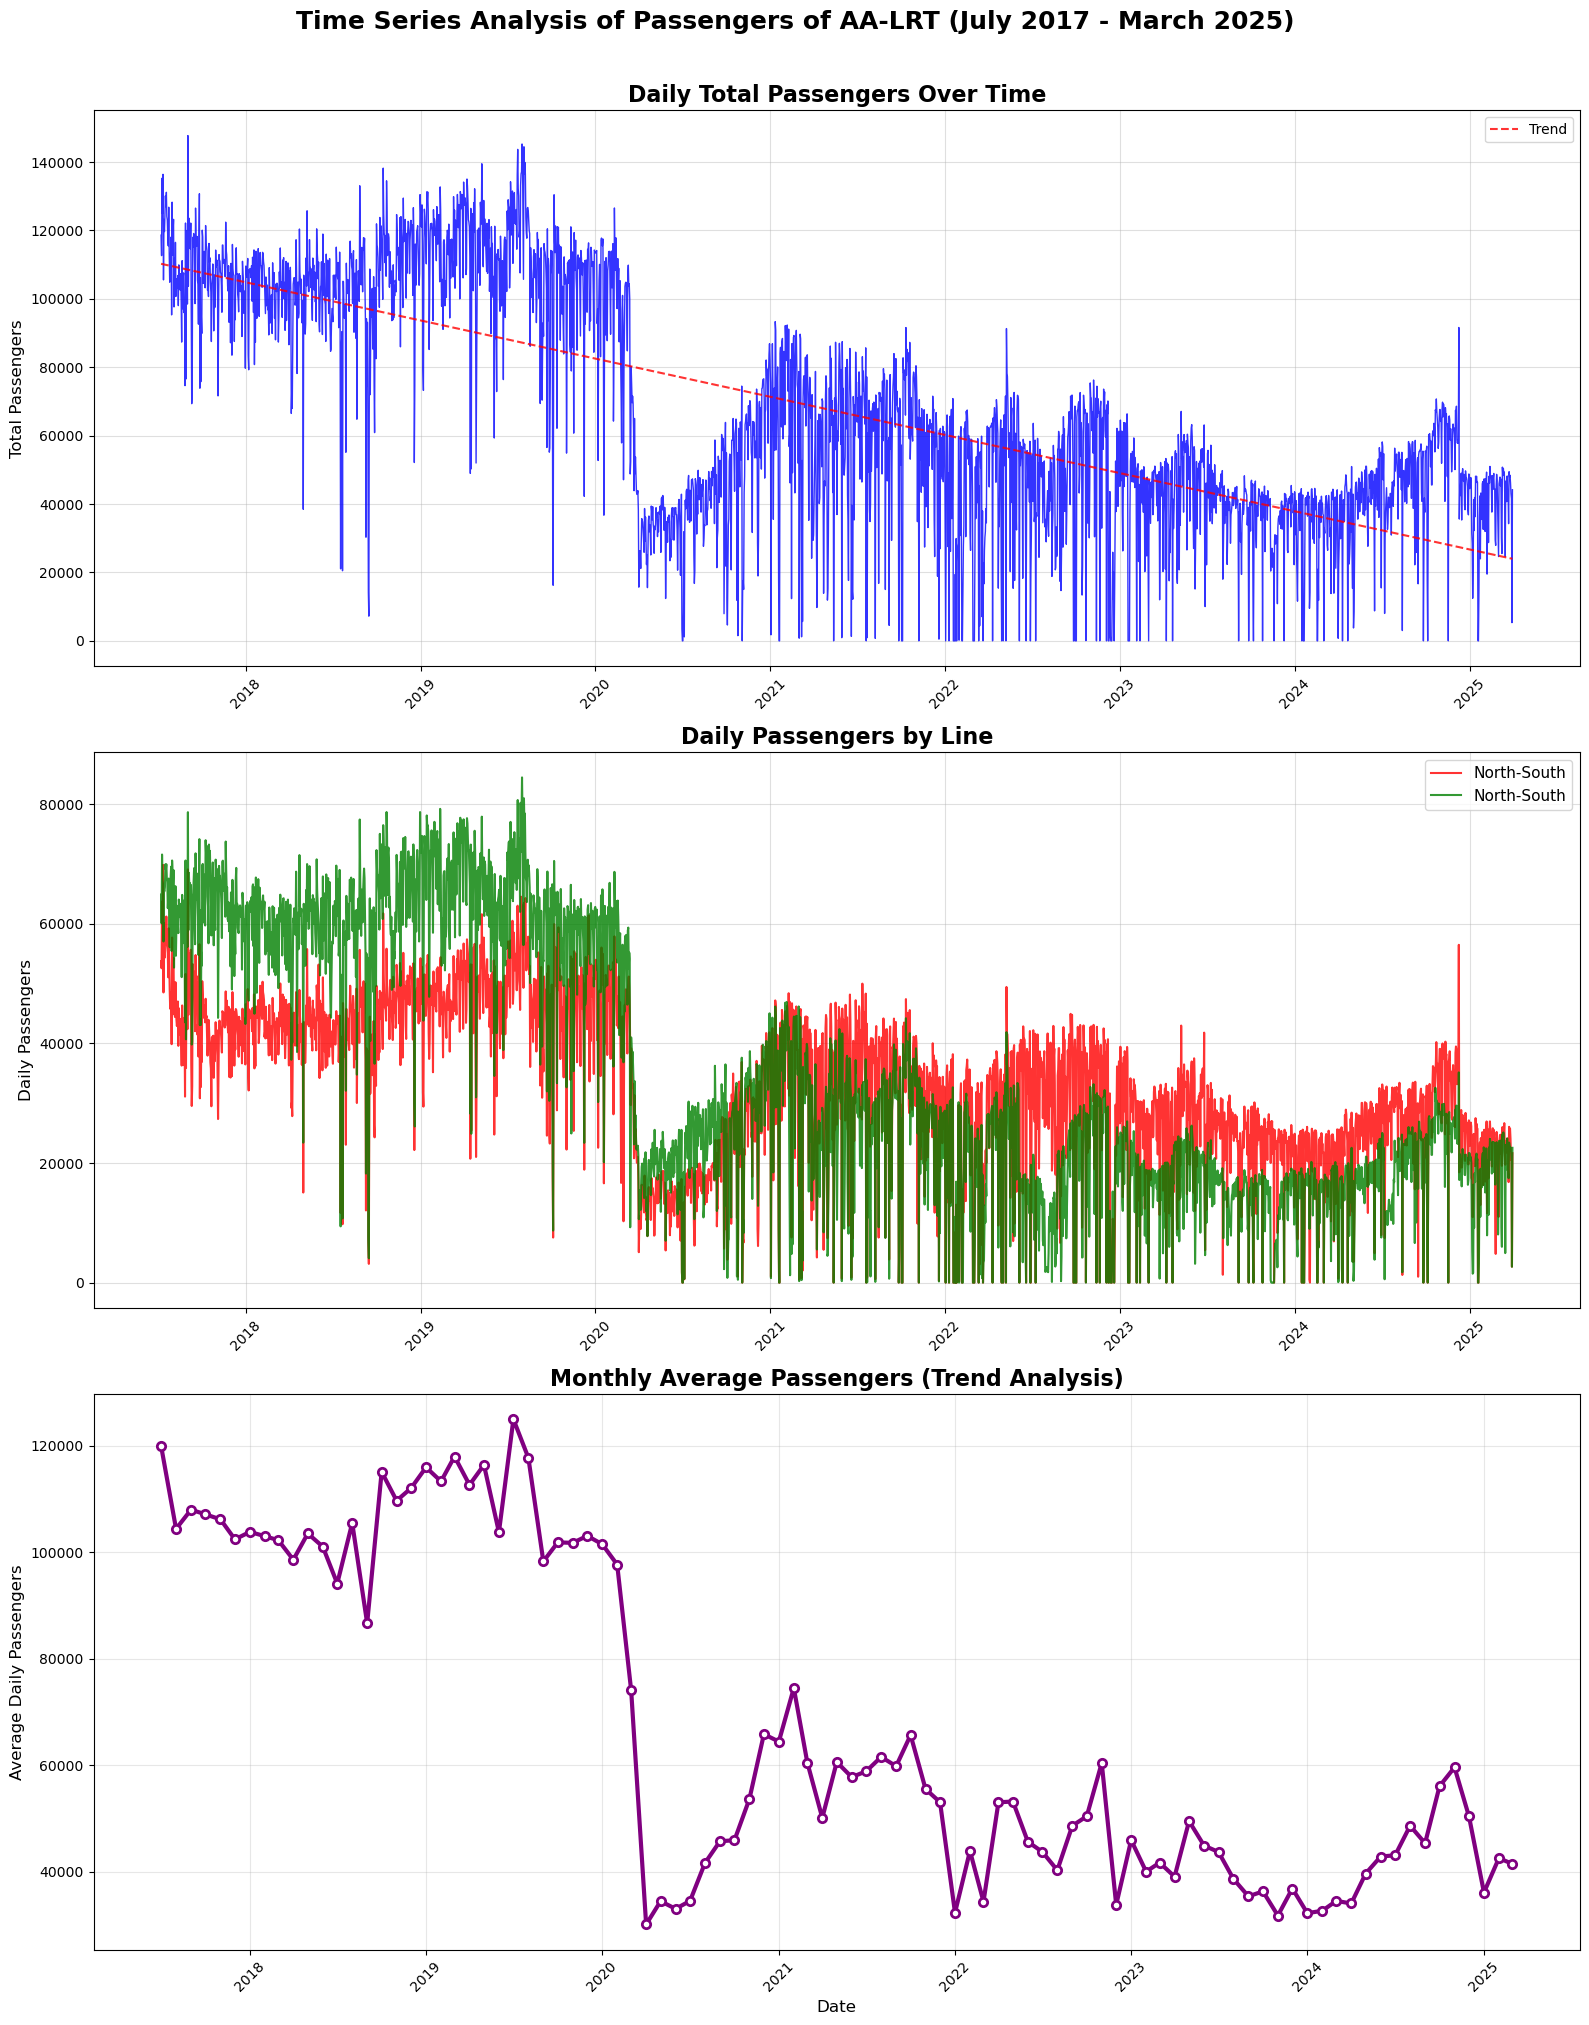

In [10]:
fig, axes = plt.subplots(3, 1, figsize = (16, 20))
fig.suptitle("Time Series Analysis of Passengers of AA-LRT (July 2017 - March 2025)", fontsize = 18, fontweight = 'bold', y = 1.01)

# 1. Total passengers over time
axes[0].plot(data['date'], data['passengers_total'], alpha = 0.8, linewidth = 1, color = 'blue')
axes[0].set_title("Daily Total Passengers Over Time", fontsize = 16, fontweight = 'bold')
axes[0].set_ylabel("Total Passengers", fontsize = 12)
axes[0].grid(True, alpha = 0.4)
axes[0].tick_params(axis = 'x', rotation = 45)

# Trend line
z = np.polyfit(range(len(data)), data['passengers_total'], 1)
p = np.poly1d(z)
axes[0].plot(data['date'], p(range(len(data))), "r--", alpha=0.8, label=f'Trend')
axes[0].legend()

# 2. Line comparasion
axes[1].plot(data['date'], data['passengers_ns'], alpha = 0.8, label = 'North-South', color = 'red')
axes[1].plot(data['date'], data['passengers_ew'], alpha = 0.8, label = 'North-South', color = 'green')
axes[1].set_title("Daily Passengers by Line", fontsize = 16, fontweight = 'bold')
axes[1].set_ylabel("Daily Passengers", fontsize = 12)
axes[1].legend(fontsize = 11)
axes[1].grid(True, alpha = 0.4)
axes[1].tick_params(axis = 'x', rotation = 45)

# 3. Monthly trends
monthly_data = data.groupby(['year', 'month'])['passengers_total'].mean()
monthly_index = pd.to_datetime([f"{year}-{month:02d}" for year, month in monthly_data.index])
axes[2].plot(monthly_index, monthly_data.values, marker='o', linewidth=3, 
             markersize=6, color='purple', markerfacecolor='white', markeredgewidth=2)
axes[2].set_title('Monthly Average Passengers (Trend Analysis)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Average Daily Passengers', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../reports/figures/passengers_time_series.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## 4.2 Day-of-Week Patterns

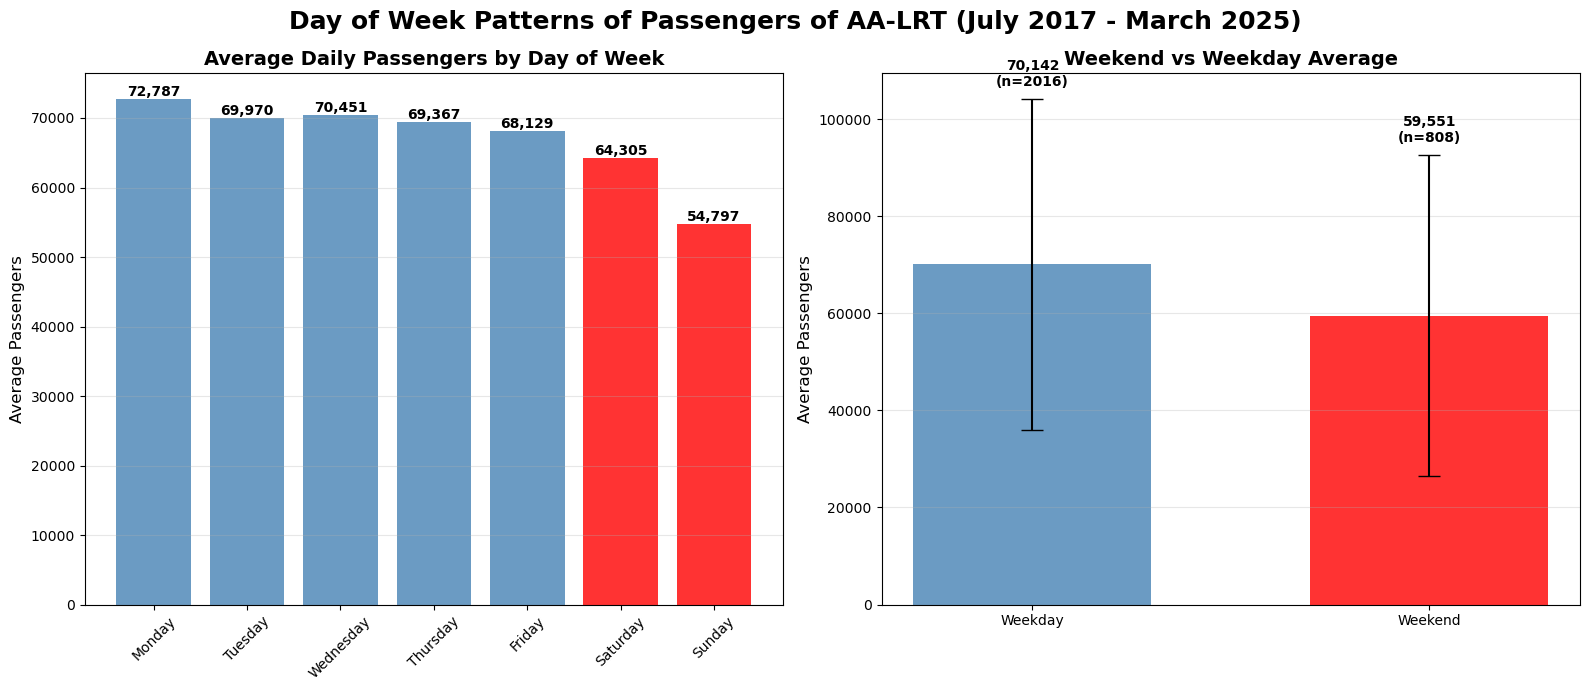

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (16, 7))
fig.suptitle("Day of Week Patterns of Passengers of AA-LRT (July 2017 - March 2025)", fontsize = 18, fontweight = 'bold')


# Average pasengers by day of week
day_avg = data.groupby(['day_name'])['passengers_total'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg_ordered = day_avg.reindex(day_order)

colors = ['red' if day in ['Saturday', 'Sunday'] else 'steelblue' for day in day_order]
bar1 = axes[0].bar(day_avg_ordered.index, day_avg_ordered, color = colors, alpha = 0.8)
axes[0].set_title('Average Daily Passengers by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Passengers', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

for bar in bar1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontweight='bold')



weekday_data = data[~data['is_weekend']]['passengers_total']
weekend_data = data[data['is_weekend']]['passengers_total']

weekend_summary = data.groupby('is_weekend')['passengers_total'].agg(['mean', 'std', 'count'])
weekend_labels = ['Weekday', 'Weekend']

bar2 = axes[1].bar(weekend_labels, weekend_summary['mean'], 
                   yerr=weekend_summary['std'], capsize=8, 
                   color=['steelblue', 'red'], alpha=0.8, width=0.6)

axes[1].set_title('Weekend vs Weekday Average', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Passengers', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels with counts
for i, (mean_val, std_val, count_val) in enumerate(zip(weekend_summary['mean'], 
                                                       weekend_summary['std'],
                                                       weekend_summary['count'])):
    axes[1].text(i, mean_val + std_val + 2000, f'{mean_val:,.0f}\n(n={count_val})', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("../reports/figures/passengers_by_day_of_week.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## 4.3 Monthly and Seasonal Analysis

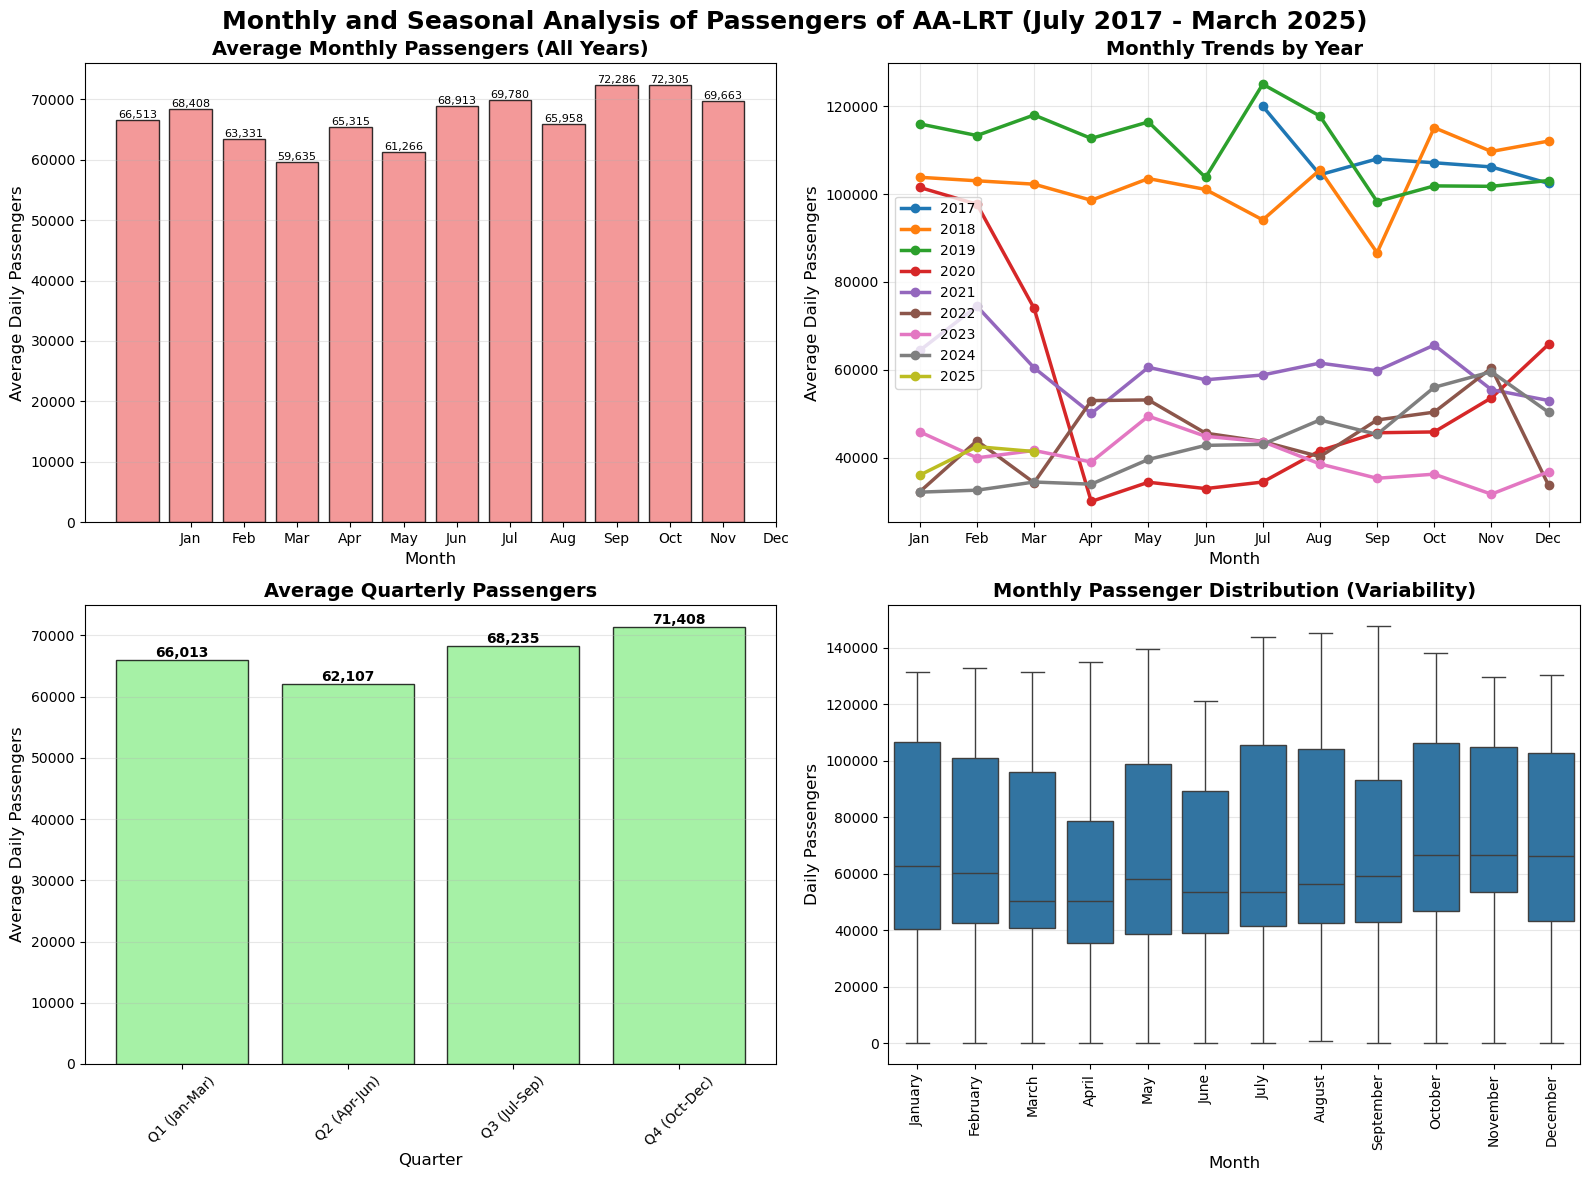

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle("Monthly and Seasonal Analysis of Passengers of AA-LRT (July 2017 - March 2025)", fontsize = 18, fontweight = 'bold')


# 1. Monthly avarages
monthly_avg = data.groupby('month')['passengers_total'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bar1 = axes[0, 0].bar(month_names, monthly_avg, color = 'lightcoral', alpha = 0.8, edgecolor = 'black', linewidth = 1)
axes[0, 0].set_title('Average Monthly Passengers (All Years)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Average Daily Passengers', fontsize=12)
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].grid(True, alpha=0.3, axis='y')

for bar in bar1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontsize = 8)


# 2. Year-over-year monthly comparison
yearly_monthly = data.groupby(['year', 'month'])['passengers_total'].mean().unstack(level=0)
for year in yearly_monthly.columns:
    axes[0, 1].plot(range(1, 13), yearly_monthly[year].values, 
                   marker='o', linewidth=2.5, label=f'{year}', markersize=6)

axes[0, 1].set_title('Monthly Trends by Year', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Average Daily Passengers', fontsize=12)
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Quarterly analysis
quarterly_avg = data.groupby('quarter')['passengers_total'].mean()
quarter_names = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
bar2 = axes[1, 0].bar(range(1, 5), quarterly_avg, color = 'lightgreen', alpha = 0.8, edgecolor = 'black', linewidth = 1)
axes[1, 0].set_title("Average Quarterly Passengers", fontsize = 14, fontweight = 'bold')
axes[1, 0].set_xlabel('Quarter', fontsize=12)
axes[1, 0].set_ylabel('Average Daily Passengers', fontsize=12)
axes[1, 0].set_xticks(range(1, 5))
axes[1, 0].set_xticklabels(quarter_names, rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

for bar in bar2:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize = 10)

# 4. Box plot by month to show variability
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data_monthly_box = data.copy()
data_monthly_box['month_name'] = pd.Categorical(data_monthly_box['month_name'], 
                                             categories=month_order, ordered=True)

sns.boxplot(data=data_monthly_box, x='month_name', y='passengers_total', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Passenger Distribution (Variability)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Daily Passengers', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("../reports/figures/monthly_and_seasonal_analysis.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## 4.4 Distribution and Correlation Analysis

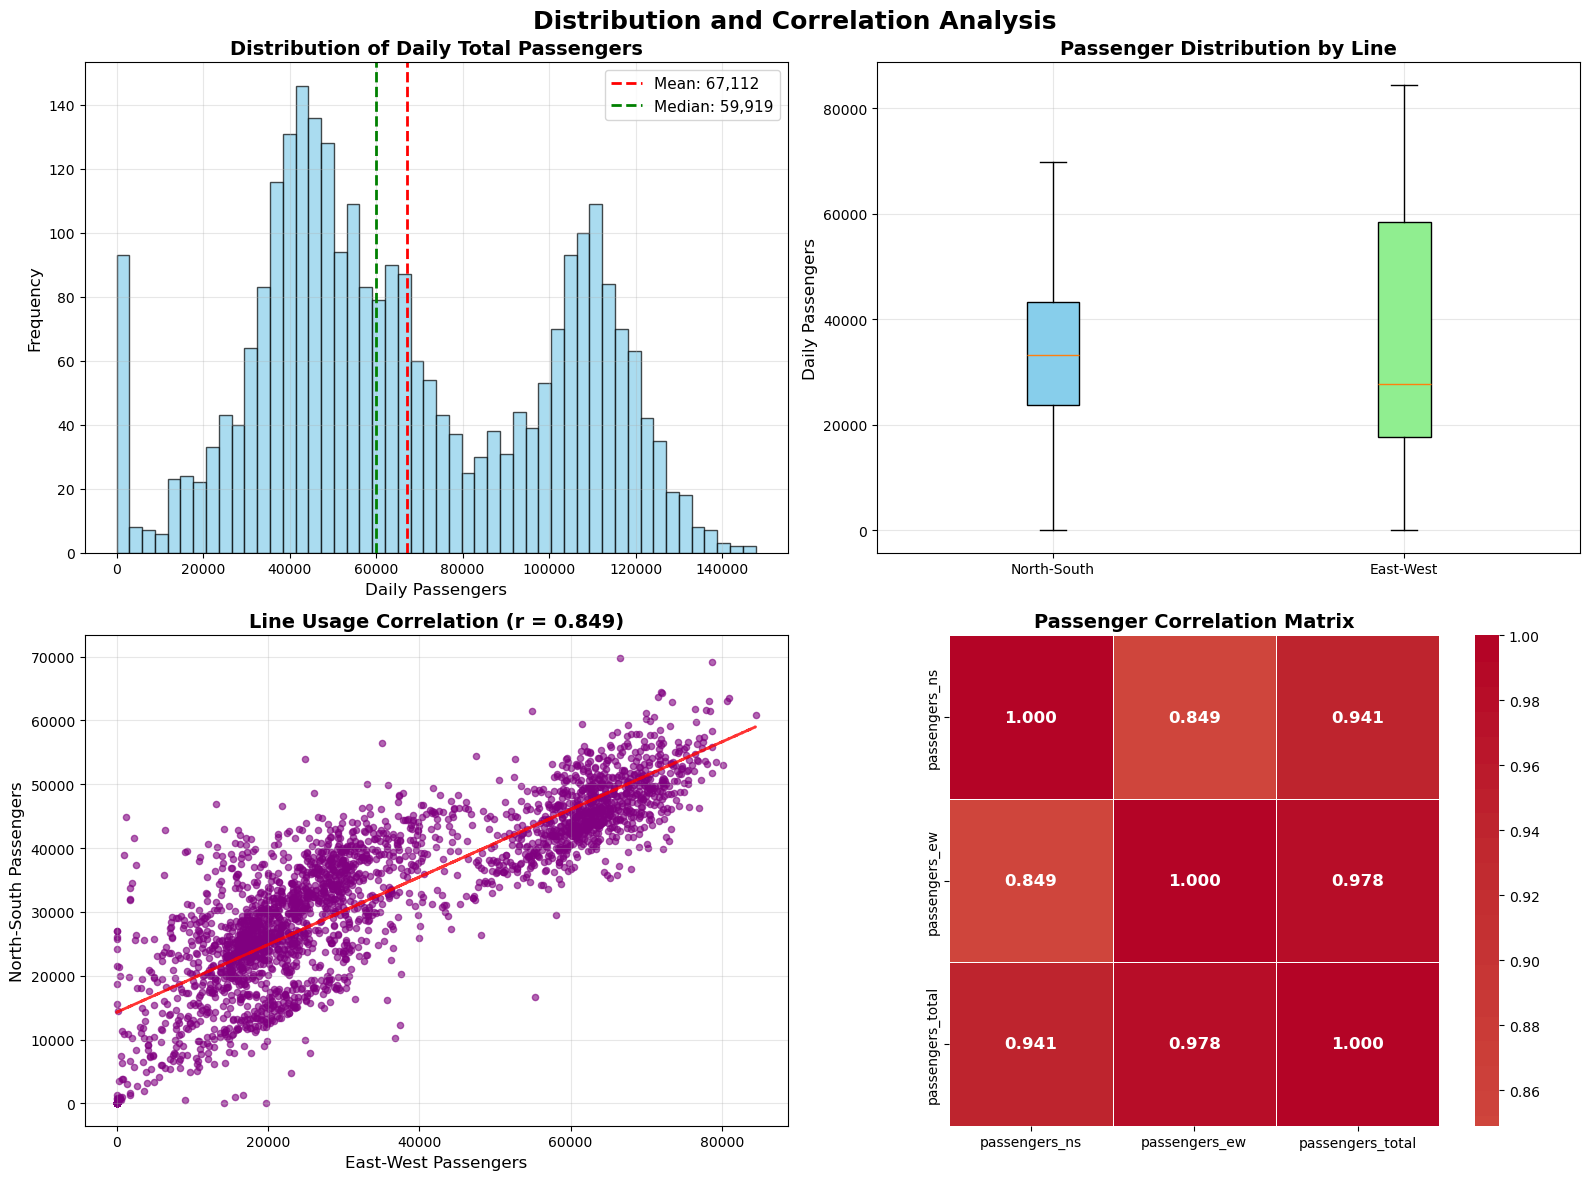

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle("Distribution and Correlation Analysis", fontsize = 18, fontweight = 'bold')

# 1. Histogram of daily passengers with statistics
axes[0, 0].hist(data['passengers_total'], bins = 50, alpha = 0.7, color = 'skyblue', edgecolor = 'black')
axes[0, 0].axvline(data['passengers_total'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f"Mean: {data['passengers_total'].mean():,.0f}")
axes[0, 0].axvline(data['passengers_total'].median(), color='green', linestyle='--', linewidth=2,
                  label=f"Median: {data['passengers_total'].median():,.0f}")
axes[0, 0].set_title('Distribution of Daily Total Passengers', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Daily Passengers', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Line comparison box plot
box_data = [data['passengers_ns'], data['passengers_ew']]
box_labels = ['North-South', 'East-West']
boxplots = axes[0, 1].boxplot(box_data, labels=box_labels, patch_artist=True)

# Color the boxes
colors = ['skyblue', 'lightgreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

axes[0, 1].set_title('Passenger Distribution by Line', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Daily Passengers', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

#3. Scatter plot : NS vs EW passengers
axes[1, 0].scatter(data['passengers_ew'], data['passengers_ns'], alpha = 0.6, color = 'purple', s = 20)

# Add correlation line
correlation = data['passengers_ew'].corr(data['passengers_ns'])
z = np.polyfit(data['passengers_ew'], data['passengers_ns'], 1)
p = np.poly1d(z)
axes[1, 0].plot(data['passengers_ew'], p(data['passengers_ew']), "r--", alpha=0.8, linewidth=2)

axes[1, 0].set_ylabel('North-South Passengers', fontsize=12)
axes[1, 0].set_xlabel('East-West Passengers', fontsize=12)
axes[1, 0].set_title(f'Line Usage Correlation (r = {correlation:.3f})', 
                    fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation heatmap
corr_cols = ['passengers_ns', 'passengers_ew', 'passengers_total']
if all(col in data.columns for col in corr_cols):
    corr_matrix = data[corr_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 1], square=True, linewidths=0.5,
                fmt='.3f', annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    axes[1, 1].set_title('Passenger Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("../reports/figures/distribution_and_correlation_analysis.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# 5. Key Findings and Observations
## 5.1 Data Quality Assessment Results

In [14]:
print("="*60)
print("           DATA QUALITY ASSESSMENT SUMMARY")
print("="*60)

# Completeness
print(f"   Data Completeness: {len(data):,} records")
print(f"   Date Coverage: {(data['date'].max() - data['date'].min()).days + 1} days")
print(f"   Missing Values: {data.isnull().sum().sum()} (0%)" if data.isnull().sum().sum() == 0 else f"   Missing Values: {data.isnull().sum().sum()}")

# Data ranges
print("\nPassenger Data Ranges:")
print(f"   Total Passengers: {data['passengers_total'].min()} - {data['passengers_total'].max():,} ")
print(f"   North-South Passengers: {data['passengers_ns'].min()} - {data['passengers_ns'].max():,} ")
print(f"   East-West Passengers: {data['passengers_ew'].min()} - {data['passengers_ew'].max():,} ")

# Anomalies
negative_total = (data['passengers_total'] < 0).sum()
zero_total = (data['passengers_total'] == 0).sum()
print(f"\nAnomaly Check:")
print(f"   Negative passenger counts: {negative_total}")
print(f"   Zero passenger days: {zero_total}")

print("\n" + "="*60)

           DATA QUALITY ASSESSMENT SUMMARY
   Data Completeness: 2,824 records
   Date Coverage: 2824 days
   Missing Values: 136

Passenger Data Ranges:
   Total Passengers: 0 - 147,727 
   North-South Passengers: 0 - 69,832 
   East-West Passengers: 0 - 84,459 

Anomaly Check:
   Negative passenger counts: 0
   Zero passenger days: 79



## 5.2 Insights Discovered

In [15]:
# Calculate some key business insights
print("="*60)
print("           BUSINESS INSIGHTS SUMMARY")
print("="*60)

# Peak performance
peak_day_info = data.loc[data['passengers_total'].idxmax()]
print(f"Peak Day: {peak_day_info['date'].strftime('%A, %B %d, %Y')}")
print(f"   Total passengers: {peak_day_info['passengers_total']:,}")

# Low performance  
low_day_info = data.loc[data['passengers_total'].idxmin()]
print(f"Lowest Day: {low_day_info['date'].strftime('%A, %B %d, %Y')}")
print(f"   Total passengers: {low_day_info['passengers_total']:,}")

# Weekend vs Weekday insights
weekday_avg = data[~data['is_weekend']]['passengers_total'].mean()
weekend_avg = data[data['is_weekend']]['passengers_total'].mean()
weekend_difference = ((weekend_avg - weekday_avg) / weekday_avg) * 100

print(f"\nWeekend Effect:")
print(f"   Weekdays: {weekday_avg:,.0f} avg passengers")
print(f"   Weekends: {weekend_avg:,.0f} avg passengers")
print(f"   Weekend difference: {weekend_difference:+.1f}%")

# Growth trend
first_month_avg = data[data['date'] < data['date'].min() + pd.DateOffset(months=1)]['passengers_total'].mean()
last_month_avg = data[data['date'] > data['date'].max() - pd.DateOffset(months=1)]['passengers_total'].mean()
growth_rate = ((last_month_avg - first_month_avg) / first_month_avg) * 100

print(f"\nGrowth Analysis:")
print(f"   First month average: {first_month_avg:,.0f}")
print(f"   Last month average: {last_month_avg:,.0f}")
print(f"   Overall growth: {growth_rate:+.1f}%")

print("\n" + "="*60)

           BUSINESS INSIGHTS SUMMARY
Peak Day: Saturday, September 02, 2017
   Total passengers: 147,727
Lowest Day: Wednesday, July 01, 2020
   Total passengers: 0

Weekend Effect:
   Weekdays: 70,142 avg passengers
   Weekends: 59,551 avg passengers
   Weekend difference: -15.1%

Growth Analysis:
   First month average: 118,107
   Last month average: 41,433
   Overall growth: -64.9%



# 6. Next Steps
## 6.1 Next Notebook Plannings
Tasks for next notebook based on findings:

- Handle any missing values or outliers
- Create additional engineered features
- Validate and correct any anomalies
- Prepare data for modeling
- Create train/test splits for forecasting

## 6.2 Save Results

In [16]:
# Save the enhanced dataset
data.to_csv('../data/processed/explored_transit_data.csv', index=False)
print("Enhanced dataset saved to: ../data/processed/explored_transit_data.csv")

# Save key findings summary
findings_summary = {
    'total_records': len(data),
    'date_range': f"{data['date'].min()} to {data['date'].max()}",
    'total_passengers_period': data['passengers_total'].sum(),
    'avg_daily_passengers': data['passengers_total'].mean(),
    'peak_day_passengers': data['passengers_total'].max(),
    'weekend_vs_weekday_diff': weekend_difference
}

# Convert to DataFrame and save
findings_df = pd.DataFrame([findings_summary])
findings_df.to_csv('../data/processed/exploration_summary.csv', index=False)
print("Key findings saved to: ../data/processed/exploration_summary.csv")

Enhanced dataset saved to: ../data/processed/explored_transit_data.csv
Key findings saved to: ../data/processed/exploration_summary.csv
